# Overview

Intake-esm is a data cataloging utility built on top of intake, pandas, and
xarray. Intake-esm aims to facilitate:

- the discovery of earth’s climate and weather datasets.
- the ingestion of these datasets into xarray dataset containers.

It's basic usage is shown below. To begin, let's import `intake`:


In [1]:
import intake

## Loading a catalog


At import time, intake-esm plugin is available in intake’s registry as
`esm_datastore` and can be accessed with `intake.open_esm_datastore()` function.
For demonstration purposes, we are going to use the catalog for Community Earth
System Model Large ensemble (CESM LENS) dataset publicly available in Amazon S3.

```{note}
You can learn more about CESM LENS dataset in AWS S3 [here](https://registry.opendata.aws/ncar-cesm-lens/)
```


You can load data from an
[ESM Catalog](https://github.com/NCAR/esm-collection-spec) by providing the URL
to valid ESM Catalog:


In [2]:
catalog_url = "https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm1-le.json"
col = intake.open_esm_datastore(catalog_url)
col

,unique
component,5
frequency,6
experiment,4
variable,73
path,414
variable_long_name,70
dim_per_tstep,3
start,12
end,13


The summary above tells us that this catalog contains over 400 data assets. We
can get more information on the individual data assets contained in the catalog
by calling the underlying dataframe created when it is initialized:


In [3]:
col.df.head()

,component,frequency,experiment,variable,path,variable_long_name,dim_per_tstep,start,end
0,atm,daily,20C,FLNS,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLNS....,net longwave flux at surface,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00
1,atm,daily,20C,FLNSC,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLNSC...,clearsky net longwave flux at surface,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00
2,atm,daily,20C,FLUT,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLUT....,upwelling longwave flux at top of model,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00
3,atm,daily,20C,FSNS,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FSNS....,net solar flux at surface,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00
4,atm,daily,20C,FSNSC,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FSNSC...,clearsky net solar flux at surface,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00


## Finding unique entries for individual columns

To get unique values for given columns in the catalog, intake-esm provides a
{py:meth}`~intake_esm.core.esm_datastore.unique` method. This method returns a
dictionary containing count, and unique values:


In [4]:
col.unique(columns=["component", "frequency", "experiment"])

{'component': {'count': 5,
  'values': ['atm', 'ice_nh', 'ice_sh', 'lnd', 'ocn']},
 'frequency': {'count': 6,
  'values': ['daily',
   'hourly6-1990-2005',
   'hourly6-2026-2035',
   'hourly6-2071-2080',
   'monthly',
   'static']},
 'experiment': {'count': 4, 'values': ['20C', 'CTRL', 'HIST', 'RCP85']}}

## Search

The {py:meth}`~intake_esm.core.esm_datastore.search` method allows the user to
perform a query on a catalog using keyword arguments. The keyword argument names
must be the names of the columns in the catalog. The search method returns a
subset of the catalog with all the entries that match the provided query.

### Exact Match Keywords

By default, the {py:meth}`~intake_esm.core.esm_datastore.search` method looks
for exact matches


In [5]:
col_subset = col.search(
    component=["ice_nh", "lnd"],
    frequency=["monthly"],
    experiment=["20C", "HIST"],
)
col_subset.df

,component,frequency,experiment,variable,path,variable_long_name,dim_per_tstep,start,end
0,ice_nh,monthly,20C,aice,s3://ncar-cesm-lens/ice_nh/monthly/cesmLE-20C-...,ice area (aggregate),2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
1,ice_nh,monthly,20C,hi,s3://ncar-cesm-lens/ice_nh/monthly/cesmLE-20C-...,grid cell mean ice thickness,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
2,ice_nh,monthly,HIST,aice,s3://ncar-cesm-lens/ice_nh/monthly/cesmLE-HIST...,ice area (aggregate),1.0,1850-01-16 12:00:00,1919-12-16 12:00:00
3,ice_nh,monthly,HIST,hi,s3://ncar-cesm-lens/ice_nh/monthly/cesmLE-HIST...,grid cell mean ice thickness,1.0,1850-01-16 12:00:00,1919-12-16 12:00:00
4,lnd,monthly,20C,FSNO,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-FSN...,fraction of ground covered by snow,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
5,lnd,monthly,20C,H2OSNO,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-H2O...,snow depth (liquid water),2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
6,lnd,monthly,20C,QRUNOFF,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-QRU...,total liquid runoff (does not include qsnwcpice),2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
7,lnd,monthly,20C,RAIN,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-RAI...,atmospheric rain,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
8,lnd,monthly,20C,SNOW,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-SNO...,atmospheric snow,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
9,lnd,monthly,20C,SOILLIQ,s3://ncar-cesm-lens/lnd/monthly/cesmLE-20C-SOI...,soil liquid water (vegetated landunits only),3.0,1920-01-16 12:00:00,2005-12-16 12:00:00


### Substring matches


As pointed earlier, the search method looks for exact matches by default.
However, with use of wildcards and/or regular expressions, we can find all items
with a particular substring in a given column:


In [6]:
# Find all entries with `wind` in their variable_long_name
col.search(variable_long_name="wind*").df

,component,frequency,experiment,variable,path,variable_long_name,dim_per_tstep,start,end
0,atm,daily,20C,UBOT,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-UBOT....,lowest model level zonal wind,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00
1,atm,daily,20C,WSPDSRFAV,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-WSPDS...,horizontal total wind speed average at the sur...,2.0,1920-01-01 12:00:00,2005-12-31 12:00:00
2,atm,daily,HIST,UBOT,s3://ncar-cesm-lens/atm/daily/cesmLE-HIST-UBOT...,lowest model level zonal wind,1.0,1850-01-01 12:00:00,1919-12-31 12:00:00
3,atm,daily,HIST,WSPDSRFAV,s3://ncar-cesm-lens/atm/daily/cesmLE-HIST-WSPD...,horizontal total wind speed average at the sur...,1.0,1850-01-01 12:00:00,1919-12-31 12:00:00
4,atm,hourly6-1990-2005,20C,U,s3://ncar-cesm-lens/atm/hourly6-1990-2005/cesm...,zonal wind,3.0,1990-01-01 00:00:00,2006-01-01 00:00:00
5,atm,hourly6-2026-2035,RCP85,U,s3://ncar-cesm-lens/atm/hourly6-2026-2035/cesm...,zonal wind,3.0,2026-01-01 00:00:00,2036-01-01 00:00:00
6,atm,hourly6-2071-2080,RCP85,U,s3://ncar-cesm-lens/atm/hourly6-2071-2080/cesm...,zonal wind,3.0,2071-01-01 00:00:00,2081-01-01 00:00:00
7,atm,monthly,20C,U,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-U.zarr,zonal wind,3.0,1920-01-16 12:00:00,2005-12-16 12:00:00
8,atm,monthly,CTRL,U,s3://ncar-cesm-lens/atm/monthly/cesmLE-CTRL-U....,zonal wind,3.0,0400-01-16 12:00:00,2200-12-16 12:00:00
9,atm,monthly,HIST,U,s3://ncar-cesm-lens/atm/monthly/cesmLE-HIST-U....,zonal wind,2.0,1850-01-16 12:00:00,1919-12-16 12:00:00


In [7]:
# Find all entries whose variable long name starts with `wind`
col.search(variable_long_name="^wind").df

,component,frequency,experiment,variable,path,variable_long_name,dim_per_tstep,start,end
0,ocn,monthly,20C,TAUX,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-TAU...,windstress in grid-x direction,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
1,ocn,monthly,20C,TAUX2,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-TAU...,windstress**2 in grid-x direction,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
2,ocn,monthly,20C,TAUY,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-TAU...,windstress in grid-y direction,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
3,ocn,monthly,20C,TAUY2,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-TAU...,windstress**2 in grid-y direction,2.0,1920-01-16 12:00:00,2005-12-16 12:00:00
4,ocn,monthly,CTRL,TAUX,s3://ncar-cesm-lens/ocn/monthly/cesmLE-CTRL-TA...,windstress in grid-x direction,2.0,0400-01-16 12:00:00,2200-12-16 12:00:00
5,ocn,monthly,CTRL,TAUX2,s3://ncar-cesm-lens/ocn/monthly/cesmLE-CTRL-TA...,windstress**2 in grid-x direction,2.0,0400-01-16 12:00:00,2200-12-16 12:00:00
6,ocn,monthly,CTRL,TAUY,s3://ncar-cesm-lens/ocn/monthly/cesmLE-CTRL-TA...,windstress in grid-y direction,2.0,0400-01-16 12:00:00,2200-12-16 12:00:00
7,ocn,monthly,CTRL,TAUY2,s3://ncar-cesm-lens/ocn/monthly/cesmLE-CTRL-TA...,windstress**2 in grid-y direction,2.0,0400-01-16 12:00:00,2200-12-16 12:00:00
8,ocn,monthly,HIST,TAUX,s3://ncar-cesm-lens/ocn/monthly/cesmLE-HIST-TA...,windstress in grid-x direction,1.0,1850-01-16 12:00:00,1919-12-16 12:00:00
9,ocn,monthly,HIST,TAUX2,s3://ncar-cesm-lens/ocn/monthly/cesmLE-HIST-TA...,windstress**2 in grid-x direction,1.0,1850-01-16 12:00:00,1919-12-16 12:00:00


## Loading datasets


Intake-esm implements convenience utilities for loading the query results into
higher level xarray datasets. The logic for merging/concatenating the query
results into higher level xarray datasets is provided in the input JSON file and
is available under `.aggregation_info` property:


In [8]:
col.aggregation_info

AggregationInfo(groupby_attrs=['component', 'experiment', 'frequency'], variable_column_name='variable', aggregations=[{'type': 'union', 'attribute_name': 'variable', 'options': {'compat': 'override'}}], agg_columns=['variable'], aggregation_dict={'variable': {'type': 'union', 'options': {'compat': 'override'}}})

In [9]:
col.aggregation_info.aggregations

[{'type': 'union',
  'attribute_name': 'variable',
  'options': {'compat': 'override'}}]

In [10]:
# Dataframe columns used to determine groups of compatible datasets.
col.aggregation_info.groupby_attrs  # or col.groupby_attrs

['component', 'experiment', 'frequency']

In [11]:
# List of columns used to merge/concatenate compatible multiple Dataset into a single Dataset.
col.aggregation_info.agg_columns  # or col.agg_columns

['variable']

To load data assets into xarray datasets, we need to use the
{py:meth}`~intake_esm.core.esm_datastore.to_dataset_dict` method. This method
returns a dictionary of aggregate xarray datasets as the name hints.


In [12]:
dset_dicts = col_subset.to_dataset_dict(zarr_kwargs={"consolidated": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


In [13]:
[key for key in dset_dicts.keys()]

['ice_nh.HIST.monthly',
 'ice_nh.20C.monthly',
 'lnd.HIST.monthly',
 'lnd.20C.monthly']

We can access a particular dataset as follows:


In [14]:
ds = dset_dicts["lnd.20C.monthly"]
print(ds)

<xarray.Dataset>
Dimensions:         (hist_interval: 2, lat: 192, levgrnd: 15, lon: 288, member_id: 40, time: 1032)
Coordinates:
  * lat             (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * member_id       (member_id) int64 1 2 3 4 5 6 7 ... 35 101 102 103 104 105
  * time            (time) object 1920-01-16 12:00:00 ... 2005-12-16 12:00:00
    time_bounds     (time, hist_interval) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
  * levgrnd         (levgrnd) float32 0.007100635 0.027925 ... 21.32647 35.17762
Dimensions without coordinates: hist_interval
Data variables:
    FSNO            (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    H2OSNO          (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
    QRUNOFF         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288

Let’s create a quick plot for a slice of the data:


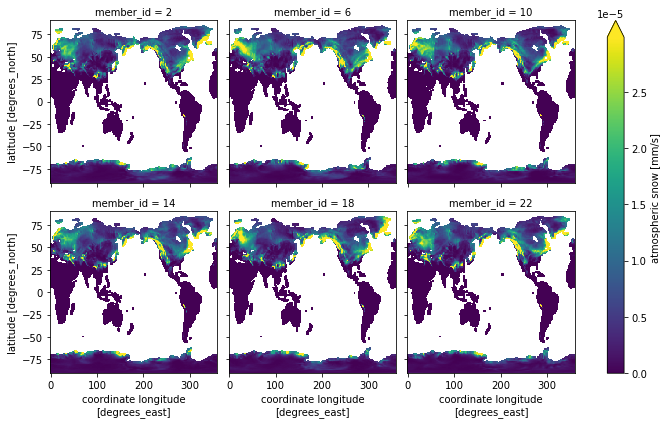

In [15]:
ds.SNOW.isel(time=0, member_id=range(1, 24, 4)).plot(
    col="member_id", col_wrap=3, robust=True
)